In [ ]:
'''
Bom, a minha máquina não suportou trabalhar em cima de um .Json de 6GB.
Então decidi mostrar meus conhecimentos em um Json de 300mb que baixei do 
próprio site que me mandaram.
OBS: para a contagem da média do campo stars eu utilizei o campo 'compliment_count'.

1- Construa um script que leia o arquivo JSON acima e publique 
o resultado para outro script processar os dados.

2- Para processamento dos dados, construa um script que calcule 
o número médio de stars para cada business_id e salve o resultado 
em um banco de dados SQL

'''

In [1]:
#importando a biblioteca do pandas (https://pandas.pydata.org/)
import pandas as pd

#biblioteca para ler arquivos json
import json

#biblioteca para trabalhar com o banco de dados
import csv, sqlite3




In [2]:
#metodo responsavel por realizar a leitura do arquivo
df_desafio = pd.read_json('C:/Users/guihb/Desktop/academic.json','r',encoding ='utf-8', lines=True)

#com o metodo head, podemos ler a quantidade de linhas que desejamos e verificar a estrutura.
df_desafio.head(6)

,user_id,business_id,text,date,compliment_count
0,hf27xTME3EiCp6NL6VtWZQ,UYX5zL_Xj9WEc_Wp-FrqHw,Here for a quick mtg,2013-11-26 18:20:08,0
1,uEvusDwoSymbJJ0auR3muQ,Ch3HkwQYv1YKw_FO06vBWA,Cucumber strawberry refresher,2014-06-15 22:26:45,0
2,AY-laIws3S7YXNl_f_D6rQ,rDoT-MgxGRiYqCmi0bG10g,Very nice good service good food,2016-07-18 22:03:42,0
3,Ue_7yUlkEbX4AhnYdUfL7g,OHXnDV01gLokiX1ELaQufA,It's a small place. The staff is friendly.,2014-06-06 01:10:34,0
4,LltbT_fUMqZ-ZJP-vJ84IQ,GMrwDXRlAZU2zj5nH6l4vQ,"8 sandwiches, $24 total...what a bargain!!! An...",2011-04-08 18:12:01,0
5,HHNBqfbDR8b1iq-QGxu8ww,ALwAlxItASeEs2vYAeLXHA,Great ramen! Not only is the presentation gorg...,2015-05-20 20:17:38,0


In [3]:
#Já com o shape, podemos avaliar a quantidade de linhas e colunas do arquivo
df_desafio.shape

(1320761, 5)

In [4]:
df_desafio.describe()

,compliment_count
count,1.320761e+06
mean,1.582270e-02
std,1.421746e-01
min,0.000000e+00
25%,0.000000e+00
50%,0.000000e+00
75%,0.000000e+00
max,1.500000e+01


In [56]:
#Nesta etapa eu criei uma nova coluna para contabilizar todas as linhas para que eu conseguisse agrupar e saber o total de compliment_count por business_id.
df_desafio['qtde'] = 1
#Qual é a quantidade média do compliment_count por business_id, agrupando pelo o mesmo.
df_media = df_desafio[['business_id','compliment_count','qtde']].groupby(['business_id'], as_index = False).sum()
df_media

,business_id,compliment_count,qtde
0,--1UhMGODdWsrMastO9DZw,0,3
1,--6MefnULPED_I942VcFNA,0,15
2,--7zmmkVg-IMGaXbuVd0SQ,0,11
3,--9QQLMTbFzLJ_oT-ON3Xw,0,3
4,--9e1ONYQuAa-CB_Rrw7Tw,3,176
...,...,...,...
132695,zztHqd_3ULxuIS8lkhYdwg,0,2
132696,zzwaS0xn1MVEPEf0hNLjew,0,21
132697,zzwhN7x37nyjP0ZM8oiHmw,0,6
132698,zzwicjPC9g246MK2M1ZFBA,1,15


In [50]:
#exportando resultado para trabalhar com o banco de dados
export_csv = df_media1.to_csv('C:/Users/guihb/Desktop/media2.csv', encoding = 'utf-8', index=False, header=True)

In [38]:
#acesando o .csv e salvando o resultado em um banco de dados SQL.

#conectar a um banco de dados
con = sqlite3.connect("media1.sql3")
cur = con.cursor()
#Criar uma tabela com os mesmos campos do arquivo .csv
cur.execute("CREATE TABLE media_intelligence (business_id varchar PRIMARY KEY, compliment_count INTEGER, qtde TEXT);") # use your column names here
#abrir o arquivo .csv para ingestão dos dados
with open('C:/Users/guihb/Desktop/media1.csv','r') as fin: 
    dr = csv.DictReader(fin) 
    to_db = [(i['business_id'], i['compliment_count'], i['qtde']) for i in dr]
#inserir os dados na tabela criada
cur.executemany("INSERT INTO media_intelligence (business_id, compliment_count, qtde ) VALUES (?, ?, ?);", to_db)
con.commit()
con.close()

In [53]:
#conectar ao banco de dados 
conn = sqlite3.connect('media1.sql3')
cur = conn.cursor()

In [62]:
#fazer uma consulta simples com os 20 primeiros dados para ver se foram carregados com sucesso
cur.execute("""
SELECT * FROM media_intelligence 
LIMIT 20;
""")

In [63]:
#visualizar os dados dentro do banco de dados.
results = cur.fetchall()
print(results)


[('--1UhMGODdWsrMastO9DZw', 0, '3'), ('--6MefnULPED_I942VcFNA', 0, '15'), ('--7zmmkVg-IMGaXbuVd0SQ', 0, '11'), ('--9QQLMTbFzLJ_oT-ON3Xw', 0, '3'), ('--9e1ONYQuAa-CB_Rrw7Tw', 3, '176'), ('--DaPTJW3-tB1vP-PfdTEg', 0, '4'), ('--DdmeR16TRb3LsjG0ejrQ', 1, '4'), ('--EX4rRznJrltyn-34Jz1w', 0, '2'), ('--FBCX-N37CMYDfs790Bnw', 1, '44'), ('--FnvijzY20d1nk9H7fk9w', 0, '1'), ('--GM_ORV2cYS-h38DSaCLw', 0, '2'), ('--I7YYLada0tSLkORTHb5Q', 0, '9'), ('--KCl2FvVQpvjzmZSPyviA', 0, '5'), ('--KQsXc-clkO7oHRqGzSzg', 0, '15'), ('--Ni3oJ4VOqfOEu7Sj2Vzg', 0, '1'), ('--Rsj71PBe31h5YljVseKA', 0, '5'), ('--S62v0QgkqQaVUhFnNHrw', 0, '9'), ('--SrzpvFLwP_YFwB_Cetow', 0, '9'), ('--TcDRzRIxhvHM4DSgEuMA', 0, '1'), ('--U98MNlDym2cLn36BBPgQ', 0, '1')]


In [65]:
#Para uma melhor visualização, os 10 primeiros. 
df = pd.read_sql_query("SELECT * FROM media_intelligence LIMIT 10", conn)
df


,business_id,compliment_count,qtde
0,--1UhMGODdWsrMastO9DZw,0,3
1,--6MefnULPED_I942VcFNA,0,15
2,--7zmmkVg-IMGaXbuVd0SQ,0,11
3,--9QQLMTbFzLJ_oT-ON3Xw,0,3
4,--9e1ONYQuAa-CB_Rrw7Tw,3,176
5,--DaPTJW3-tB1vP-PfdTEg,0,4
6,--DdmeR16TRb3LsjG0ejrQ,1,4
7,--EX4rRznJrltyn-34Jz1w,0,2
8,--FBCX-N37CMYDfs790Bnw,1,44
9,--FnvijzY20d1nk9H7fk9w,0,1


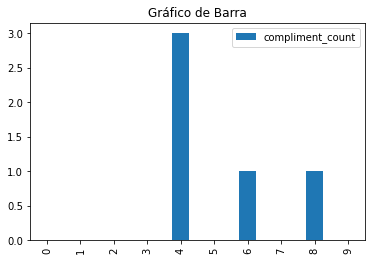

In [66]:
df.plot(kind='bar' , title = 'Gráfico de Barra')